
## Project Capstone - Overall Prediction


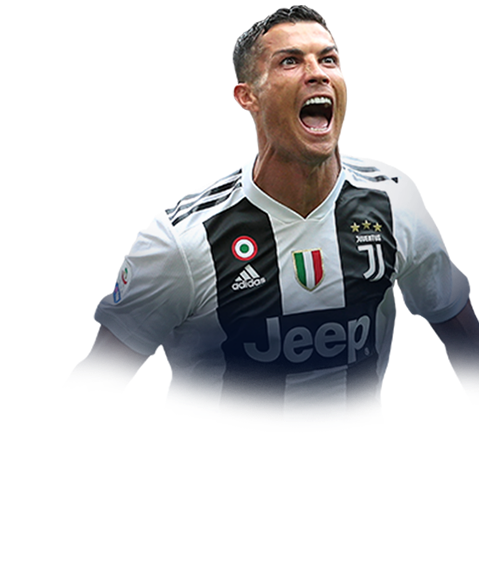



II. Analysis
1. [Data Exploration](#Data-Exploration)
    1. [Data Visualization](#Data-Visualization)
    1. [Traits and Specialities features](#Traits-and-Specialities-features)
        1. [Special Hot Encoding](#Special-Hot-encoding)
    1. [Revision feature](#Revision-feature)
    1. [Duplicates](#Duplicates)
    1. [Null or NaN Values](#Null-or-NaN-Values)

1. [Exploratory Visualization](#Exploratory-Visualization)
    1. [Missing Values](#Missing-Values)
    1. [Outliers](#Outliers)
    1. [Meaningless features](#Meaningless-features)
    1. [Drop Highly Correlated Features](#Drop-Highly-Correlated-Features)

Algorithms and Techniques

1. [Benchmark](#Benchmark)

III. Methodology

Data Preprocessing
1. [Last Hot Encoding](#Last-hot-encoding)
1. [Normalizing Numerical Features](#Normalizing-Numerical-Features)
    1. [Min Max](#Min-Max)
    1. [Log transform](#Log-transform)
1. [Implementation](#Implementation)
1. [Refinement](#Refinement)


IV. Results

1. [Model Evaluation and Validation](#Model_Evaluation_and_Validation)
1. [Justification](#Justification)

V. Conclusion

1. [Free-Form Visualization](#Free_Form_Visualization)

Reflection
Improvement


Installing packages

In [1]:
'''!pip install --upgrade pip
!pip install cufflinks
!pip install -U scikit-learn
!pip install plotly'''


'!pip install --upgrade pip\n!pip install cufflinks\n!pip install -U scikit-learn\n!pip install plotly'

In [2]:
# Define IAM role
import boto3
from sagemaker import get_execution_role

Import libraries necessary for this project

In [3]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of displ}ay() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import time

# Import supplementary visualization code visuals.py
import visuals as vs
import utils as utl
import models as mdl

# Pretty display for notebooks
#%matplotlib inline

pd.options.display.max_columns = None

In [4]:
bucket = 'algar-data-science-team'
prefix = 'sandbox/'

In [5]:
''' 
# Load the dataset for local Jupyter
data = pd.read_csv("Data\FIFA19 - Ultimate Team players.csv")

'''
# Credentials execution
role = get_execution_role()
s3 = boto3.client('s3')

# Load the dataset for AWS Jupyter
obj = s3.get_object(Bucket=bucket, Key=prefix+'FIFA19 - Ultimate Team players.csv')
data = pd.read_csv(obj['Body'],encoding='utf-8',sep=',')

# Success - Display the first record
data.head(1)

player_id player_name      player_extended_name      quality revision  \
0          1        Pelé  Arantes Nascimento Edson  Gold - Rare     Icon   

  origin  overall   club league nationality position  age date_of_birth  \
0  Prime       98  Icons  Icons      Brazil      CAM   78    23/10/1940   

   height  weight  intl_rep  added_date  pace  pace_acceleration  \
0     173      70         0  2018-09-19  95.0                 95   

   pace_sprint_speed  dribbling  drib_agility  drib_balance  drib_reactions  \
0                 95       96.0            94            93              98   

   drib_ball_control  drib_dribbling  drib_composure  shooting  \
0                 97              96              98      96.0   

   shoot_positioning  shoot_finishing  shoot_shot_power  shoot_long_shots  \
0                 97               98                94                94   

   shoot_volleys  shoot_penalties  passing  pass_vision  pass_crossing  \
0             95               93     93.0           97             90   

   pass_free_kick  pass_short  pass_long  pass_curve  defending  \
0              89          96         88          89       60.0   

   def_interceptions  def_heading  def_marking  def_stand_tackle  \
0                 67           94           55                53   

   def_slid_tackle  physicality  phys_jumping  phys_stamina  phys_strength  \
0               49         76.0            88            86             76   

   phys_aggression  gk_diving  gk_reflexes  gk_handling  gk_speed  gk_kicking  \
0               59        NaN          NaN          NaN       NaN         NaN   

   gk_positoning pref_foot att_workrate def_workrate  weak_foot  skill_moves  \
0            NaN     Right         High          Med          4            5   

     cb    rb    lb   rwb   lwb   cdm    cm    rm    lm   cam    cf    rf  \
0  70.0  77.0  77.0  79.0  79.0  77.0  91.0  95.0  95.0  96.0  96.0  96.0   

     lf    rw    lw    st        traits  \
0  96.0  96.0  96.0  95.0  Finesse Shot   

                                        specialities  base_id  resource_id  \
0  Speedster, Aerial Threat, Dribbler, Play Maker...   237067       237067   

   ps4_last  ps4_min   ps4_max  ps4_prp  xbox_last  xbox_min  xbox_max  \
0   5020000   541000  10300000       45          0    472000   9000000   

   xbox_prp  pc_last  pc_min    pc_max  pc_prp  
0        58  6400000  535000  10100000      61

----
## Data Exploration 

In [6]:
#Cheking the rows and columns
data.shape

(18831, 95)

In [7]:
#Picking the common features for example 
data[['age','pace','shooting','passing','dribbling','defending','physicality']].describe()

age          pace      shooting       passing     dribbling  \
count  18831.000000  16882.000000  16882.000000  16882.000000  16882.000000   
mean      26.364027     69.072859     54.609762     59.218398     64.323540   
std        5.223632     11.909037     15.107605     11.419965     10.906452   
min       17.000000     24.000000     15.000000     24.000000     24.000000   
25%       23.000000     62.000000     44.000000     52.000000     58.000000   
50%       26.000000     70.000000     56.000000     59.000000     65.000000   
75%       29.000000     77.000000     65.000000     67.000000     71.000000   
max       89.000000     99.000000     99.000000     99.000000     99.000000   

          defending   physicality  
count  16882.000000  16882.000000  
mean      52.701339     66.620187  
std       16.722049      9.684565  
min       15.000000     30.000000  
25%       38.000000     61.000000  
50%       57.000000     68.000000  
75%       65.000000     73.000000  
max       98.000000     97.000000

In [8]:
#Uderstanding overall feature
data[['overall']].describe()

overall
count  18831.000000
mean      68.200839
std        8.143145
min       47.000000
25%       63.000000
50%       67.000000
75%       73.000000
max       99.000000

In [9]:
#Understanding the features data types
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18831 entries, 0 to 18830
Data columns (total 95 columns):
player_id               18831 non-null int64
player_name             18831 non-null object
player_extended_name    18831 non-null object
quality                 18831 non-null object
revision                18826 non-null object
origin                  2478 non-null object
overall                 18831 non-null int64
club                    18831 non-null object
league                  18831 non-null object
nationality             18831 non-null object
position                18831 non-null object
age                     18831 non-null int64
date_of_birth           18831 non-null object
height                  18831 non-null int64
weight                  18831 non-null int64
intl_rep                18831 non-null int64
added_date              18831 non-null object
pace                    16882 non-null float64
pace_acceleration       18831 non-null int64
pace_sprint_speed       

----
## Data Visualization

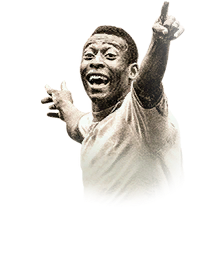

In [10]:
#Understanding the distrubution of the numeric data
data.hist(figsize=(160,128));

Example of a very skewed data

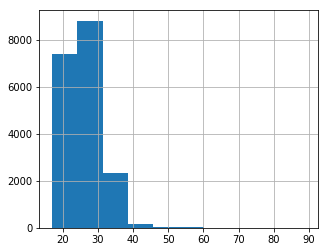

In [11]:
#Understanding the distrubution of the numeric data
data['age'].hist(figsize=(5,4));

This is supposed to be the most important atributes of a player:

* PAC = pace
* SHO = shooting
* PAS = passing
* DRI = dribbling
* DEF = defending
* PHY = physicality

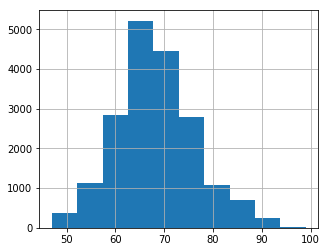

In [12]:
data['overall'].hist(figsize=(5,4));

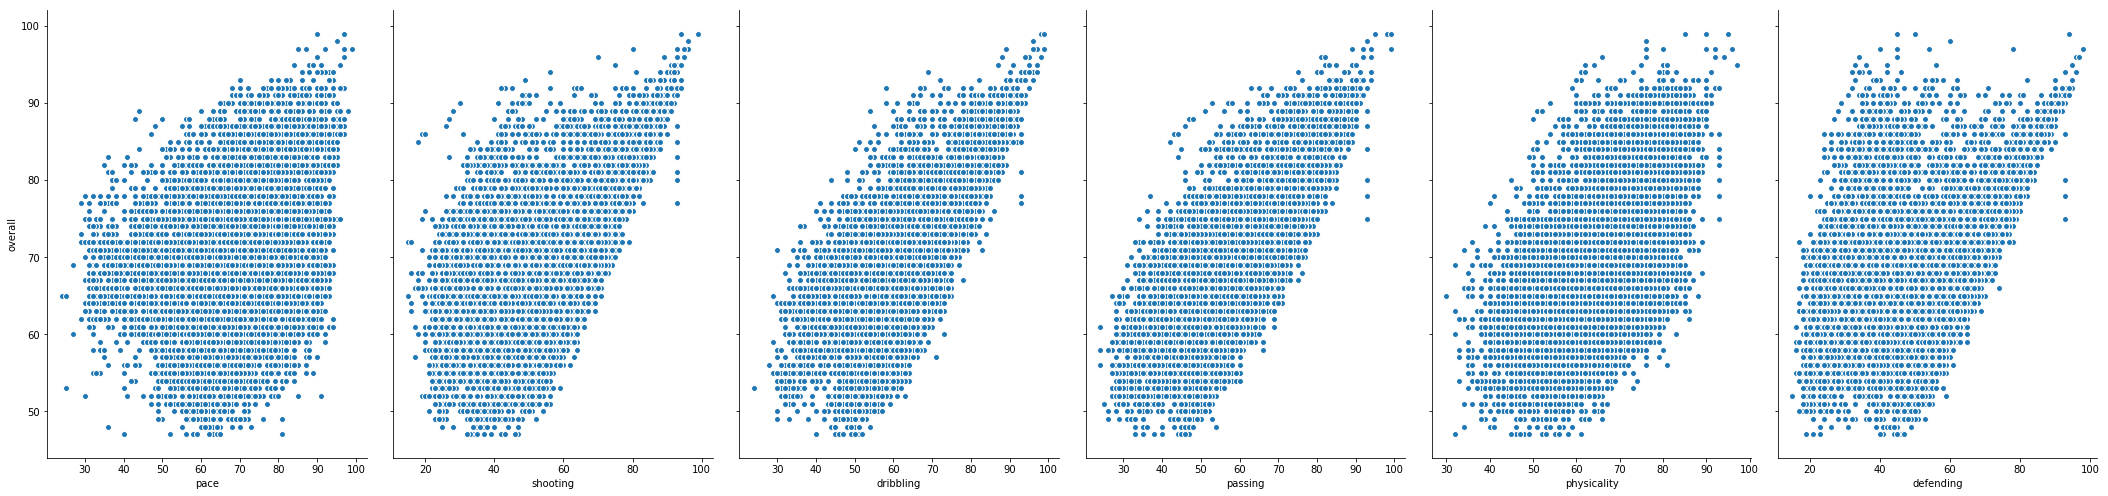

In [13]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['pace','shooting','dribbling','passing','physicality','defending'], y_vars='overall', size=7, aspect=0.7)

* relação entre overall e price
* liga com maior overall
* posição com maior overall
* país com maior overal
* melhores jogadores chutam com qual pe?
* se todos os jogasores fossem iguais qual seria o overaal para cada um? Media? data.sum()
* ordenar o dataset new_train_df = train_df.reindex(list(reversed(range(891))))
* verificar se existe o basis stats (somatoria dos atributos)
* verificar se existe popularidade ou criar futbin.com
* inclina~ção para o ataque e defesa h/h
* verificar os caras mais altos para cruzamento heading
* soma das features da overall?
* relação de players de linha e gk
* limite de overall por quality


** para fazer no futuro um algoritmo de previsao de somente os modelos

# Feature Egineering

----
## Traits and Specialities features

Some data have a encoded information inside, like Traits and Specilites as we can se above:

In [14]:
data.traits.head()

0                                         Finesse Shot
1    Avoids Using Weaker Foot, Finesse Shot, Flair,...
2           Tries To Beat Defensive Line, Finesse Shot
3                                         Finesse Shot
4    Avoids Using Weaker Foot, Finesse Shot, Flair,...
Name: traits, dtype: object

In [15]:
data.specialities.head()

0    Speedster, Aerial Threat, Dribbler, Play Maker...
1    Speedster, Dribbler, Play Maker, Distance Shoo...
2    Speedster, Dribbler, Distance Shooter, FK Spec...
3    Speedster, Dribbler, Distance Shooter, Crosser...
4    Dribbler, Play Maker, Distance Shooter, Crosse...
Name: specialities, dtype: object

As we can see, for features "traits" and "specilities" both have some information that can be useful for the model but this information i'snt in a good stand to be processed. This information shows some nes information about player's characteristics.

For this case, i create a function that separates the domain of the information of a given feature and after that generates a hot-encoding (dummy) for each new feature

In [16]:
data.loc[[36]]['traits']

36    NaN
Name: traits, dtype: object

In [17]:
#Replacing missing categoric values
data['traits'] = data['traits'].fillna('No traits')

In [18]:
data.loc[[36]]['traits']

36    No traits
Name: traits, dtype: object

### Special Hot Encoding

In [19]:
# feature 'traits' hot encoding
data = utl.hot_encoding(data, 'traits')

Quantidade de novas colunas: 36


In [20]:
#Replacing missing categoric values
data['specialities'] = data['specialities'].fillna('No specialities')

In [21]:
data = utl.hot_encoding(data, 'specialities')

Quantidade de novas colunas: 17


In [22]:
data.head(1)

player_id player_name      player_extended_name      quality revision  \
0          1        Pelé  Arantes Nascimento Edson  Gold - Rare     Icon   

  origin  overall   club league nationality position  age date_of_birth  \
0  Prime       98  Icons  Icons      Brazil      CAM   78    23/10/1940   

   height  weight  intl_rep  added_date  pace  pace_acceleration  \
0     173      70         0  2018-09-19  95.0                 95   

   pace_sprint_speed  dribbling  drib_agility  drib_balance  drib_reactions  \
0                 95       96.0            94            93              98   

   drib_ball_control  drib_dribbling  drib_composure  shooting  \
0                 97              96              98      96.0   

   shoot_positioning  shoot_finishing  shoot_shot_power  shoot_long_shots  \
0                 97               98                94                94   

   shoot_volleys  shoot_penalties  passing  pass_vision  pass_crossing  \
0             95               93     93.0           97             90   

   pass_free_kick  pass_short  pass_long  pass_curve  defending  \
0              89          96         88          89       60.0   

   def_interceptions  def_heading  def_marking  def_stand_tackle  \
0                 67           94           55                53   

   def_slid_tackle  physicality  phys_jumping  phys_stamina  phys_strength  \
0               49         76.0            88            86             76   

   phys_aggression  gk_diving  gk_reflexes  gk_handling  gk_speed  gk_kicking  \
0               59        NaN          NaN          NaN       NaN         NaN   

   gk_positoning pref_foot att_workrate def_workrate  weak_foot  skill_moves  \
0            NaN     Right         High          Med          4            5   

     cb    rb    lb   rwb   lwb   cdm    cm    rm    lm   cam    cf    rf  \
0  70.0  77.0  77.0  79.0  79.0  77.0  91.0  95.0  95.0  96.0  96.0  96.0   

     lf    rw    lw    st  base_id  resource_id  ps4_last  ps4_min   ps4_max  \
0  96.0  96.0  96.0  95.0   237067       237067   5020000   541000  10300000   

   ps4_prp  xbox_last  xbox_min  xbox_max  xbox_prp  pc_last  pc_min  \
0       45          0    472000   9000000        58  6400000  535000   

     pc_max  pc_prp  Finesse Shot  Avoids Using Weaker Foot  Flair  \
0  10100000      61             1                         0      0   

   Takes Finesse Free Kicks  Tries To Beat Defensive Line  Team Player  \
0                         0                             0            0   

   Puncher  Power Free-Kick  Power Header  Speed Dribbler (CPU AI Only)  \
0        0                0             0                             0   

   Playmaker (CPU AI Only)  Chip Shot (CPU AI Only)  Outside Foot Shot  \
0                        0                        0                  0   

   Technical Dribbler (CPU AI Only)  Set Play Specialist  Solid Player  \
0                                 0                    0             0   

   Leadership  GK Up for Corners  1-on-1 Rush  \
0           0                  0            0   

   Dives Into Tackles (CPU AI Only)  Long Passer (CPU AI Only)  \
0                                 0                          0   

   Long Shot Taker (CPU AI Only)  No traits  GK Long Throw  Early Crosser  \
0                              0          0              0              0   

   Injury Prone  Long Throw-In  Target Forward  Sweeper Keeper  \
0             0              0               0               0   

   Backs Into Player  One Club Player  Cautious With Crosses  Giant Throw-in  \
0                  0                0                      0               0   

   Saves with Feet  Rushes out of goal  Comes For Crosses  Speedster  \
0                0                   0                  0          1   

   Aerial Threat  Dribbler  Play Maker  Distance Shooter  Crosser  \
0              1         1           1                 1        1   

   FK Specialist  Acrobat  Clinical Finisher  Mi

----
## Revision feature

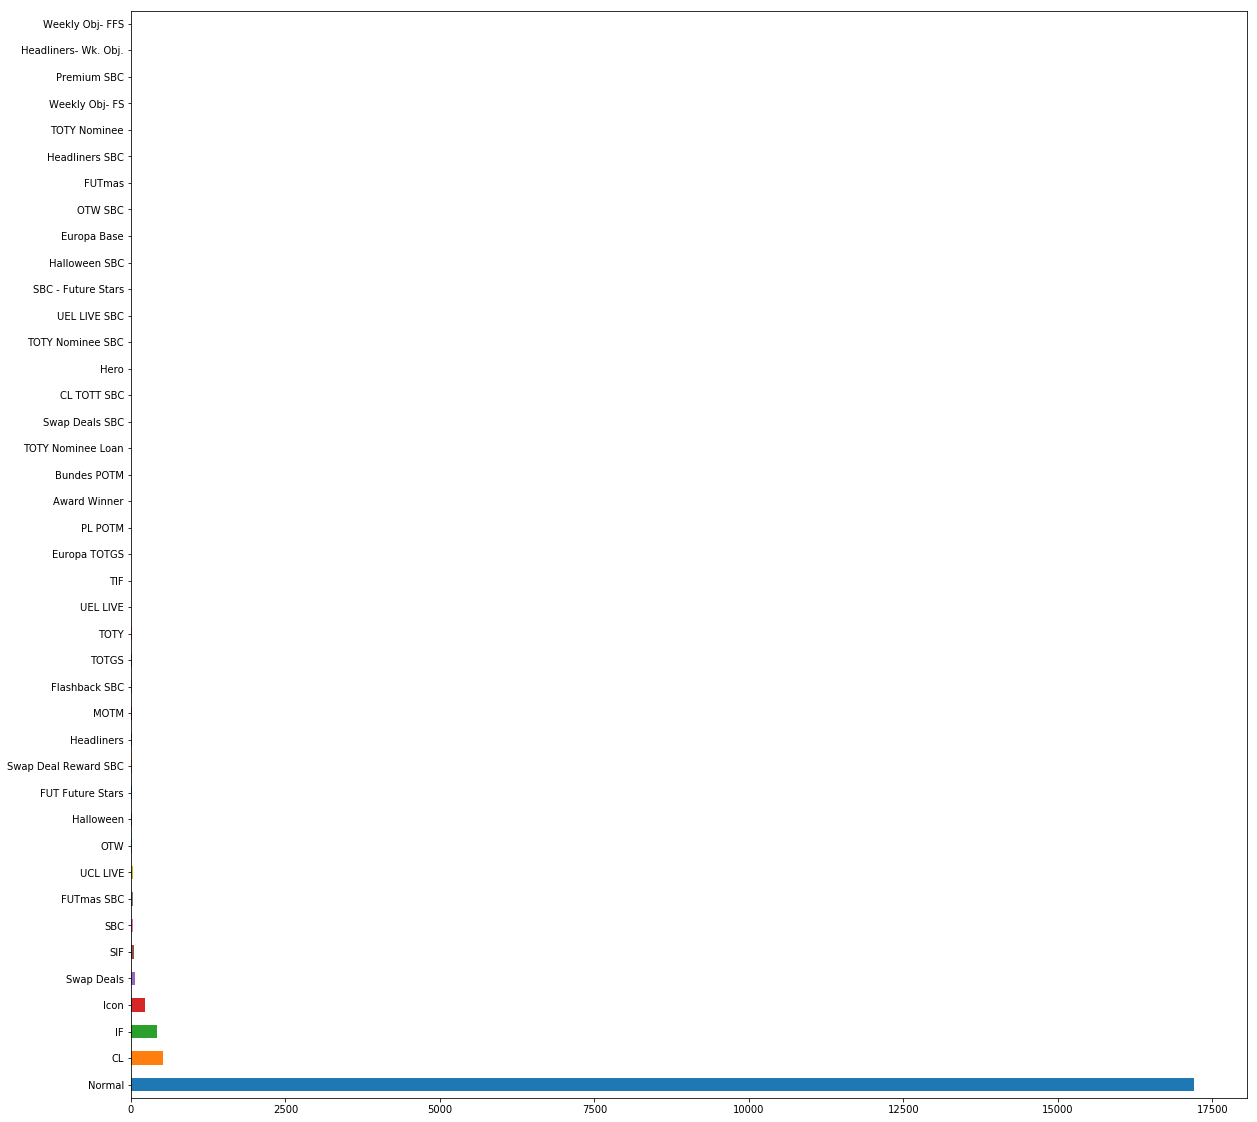

In [23]:
data['revision'].value_counts().plot(kind='barh', figsize=(20,20))

As we have so much Catergories on Revison, this coulbe be harmfull to our data set due outliers. So we will work only with the normal revision

---
## Outliers

In [24]:
data_icon = pd.DataFrame(data)
data_icon = data_icon.query('revision == "Icon"')
data = data.query('revision == "Normal"')

---
## Meaningless features

In [25]:
to_drop = ['player_id','player_name', 'player_extended_name', 'club', 'league', 'nationality', 'date_of_birth' , 'added_date',
           'base_id', 'resource_id','ps4_last','ps4_prp','xbox_prp', 'pc_last','pc_prp','GK Up for Corners','GK Long Throw',
           'Sweeper Keeper','Saves with Feet', 'gk_diving', 'gk_reflexes','gk_handling','gk_speed','gk_kicking','gk_positoning',
         'ps4_min','No traits','No specialities','revision','intl_rep','ps4_max', 'xbox_last', 'xbox_min',
           'xbox_max','pc_min','pc_max'] 
                                 
data.drop(data[to_drop], axis=1, inplace=True)

----
## Duplicates

In [26]:
#checking for duplicate rows
print(data.duplicated().sum())

89


In [27]:
data_duplicates = data[data.duplicated()]

In [28]:
#data_duplicates

In [29]:
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [30]:
#checking for duplicate rows
print(data.duplicated().sum())

0


There is no more duplicated rows

----
## Null or NaN Values

In [31]:
#Verifying columns with null values
def num_missing(x):
    return sum(x.isnull())

data.apply(num_missing, axis=0)

quality                                 0
origin                              15504
overall                                 0
position                                0
age                                     0
height                                  0
weight                                  0
pace                                 1815
pace_acceleration                       0
pace_sprint_speed                       0
dribbling                            1815
drib_agility                            0
drib_balance                            0
drib_reactions                          0
drib_ball_control                       0
drib_dribbling                          0
drib_composure                          0
shooting                             1815
shoot_positioning                       0
shoot_finishing                         0
shoot_shot_power                        0
shoot_long_shots                        0
shoot_volleys                           0
shoot_penalties                   

---
## Exploratory Visualization

---
## Missing Values

Removing columns with 30% of missings

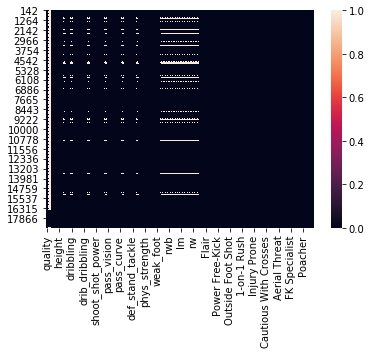

In [32]:
#visual verifying amount of nulls on the data set
sns.heatmap(data.isnull(), cbar=True)

In [33]:
#visual verifying amount of nulls on the data set
utl.plot_missing(data)

In [34]:
data = data.dropna(thresh=(1-0.3)*len(data), axis=1)
locals().update(data)
utl.plot_missing(data)

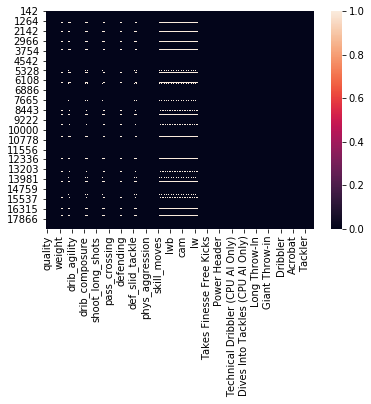

In [35]:
sns.heatmap(data.isnull(), cbar=True)

In [36]:
data.shape

(17113, 109)

We need to clear the features with more than 30% of null values in order to shapper our data. this kind of feature cannot be recovery for any technique

In [37]:
def num_missing(x):
    return sum(x.isnull())

In [38]:
data.apply(num_missing, axis=0)

quality                                0
overall                                0
position                               0
age                                    0
height                                 0
weight                                 0
pace                                1815
pace_acceleration                      0
pace_sprint_speed                      0
dribbling                           1815
drib_agility                           0
drib_balance                           0
drib_reactions                         0
drib_ball_control                      0
drib_dribbling                         0
drib_composure                         0
shooting                            1815
shoot_positioning                      0
shoot_finishing                        0
shoot_shot_power                       0
shoot_long_shots                       0
shoot_volleys                          0
shoot_penalties                        0
passing                             1815
pass_vision     

In [39]:
data.query('pace.isnull()', engine = 'python').head(1)

quality  overall position  age  height  weight  pace  \
168  Gold - Rare       84       GK   26     188      77   NaN   

     pace_acceleration  pace_sprint_speed  dribbling  drib_agility  \
168                 57                 56        NaN            70   

     drib_balance  drib_reactions  drib_ball_control  drib_dribbling  \
168            30              79                 23              19   

     drib_composure  shooting  shoot_positioning  shoot_finishing  \
168              65       NaN                 12               11   

     shoot_shot_power  shoot_long_shots  shoot_volleys  shoot_penalties  \
168                23                17             19               21   

     passing  pass_vision  pass_crossing  pass_free_kick  pass_short  \
168      NaN           44             11              13          33   

     pass_long  pass_curve  defending  def_interceptions  def_heading  \
168         31          15        NaN                 19           12   

     def_marking  def_stand_tackle  def_slid_tackle  physicality  \
168           20                12               19          NaN   

     phys_jumping  phys_stamina  phys_strength  phys_aggression pref_foot  \
168            75            30             52               25     Right   

    att_workrate def_workrate  weak_foot  skill_moves  cb  rb  lb  rwb  lwb  \
168          Med          Med          3            1 NaN NaN NaN  NaN  NaN   

     cdm  cm  rm  lm  cam  cf  rf  lf  rw  lw  st  Finesse Shot  \
168  NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN NaN             0   

     Avoids Using Weaker Foot  Flair  Takes Finesse Free Kicks  \
168                         0      0                         0   

     Tries To Beat Defensive Line  Team Player  Puncher  Power Free-Kick  \
168                             0            0        0                0   

     Power Header  Speed Dribbler (CPU AI Only)  Playmaker (CPU AI Only)  \
168             0                             0                        0   

     Chip Shot (CPU AI Only)  Outside Foot Shot  \
168                        0                  0   

     Technical Dribbler (CPU AI Only)  Set Play Specialist  Solid Player  \
168                                 0                    0             0   

     Leadership  1-on-1 Rush  Dives Into Tackles (CPU AI Only)  \
168           0            0                                 0   

     Long Passer (CPU AI Only)  Long Shot Taker (CPU AI Only)  Early Crosser  \
168                          0                              0              0   

     Injury Prone  Long Throw-In  Target Forward  Backs Into Player  \
168             1              0               0                  0   

     One Club Player  Cautious With Crosses  Giant Throw-in  \
168                0                      0               0   

     Rushes out of goal  Comes For Crosses  Speedster  Aerial Threat  \
168                   0                  0          0              0   

     Dribbler  Play Maker  Distance Shooter  Crosser  FK Specialist  Acrobat  \
168         0           0                 0        0              0        0   

     Clinical Finisher  Midfielder  Complete Forward  Poacher  Tackler  \
168                  0           0                 0        0        0   

     Tactician  Complete Defender  Strength  
168          0                  0         0

In [40]:
data.query('position == "GK"').head(1)

quality  overall position  age  height  weight  pace  \
168  Gold - Rare       84       GK   26     188      77   NaN   

     pace_acceleration  pace_sprint_speed  dribbling  drib_agility  \
168                 57                 56        NaN            70   

     drib_balance  drib_reactions  drib_ball_control  drib_dribbling  \
168            30              79                 23              19   

     drib_composure  shooting  shoot_positioning  shoot_finishing  \
168              65       NaN                 12               11   

     shoot_shot_power  shoot_long_shots  shoot_volleys  shoot_penalties  \
168                23                17             19               21   

     passing  pass_vision  pass_crossing  pass_free_kick  pass_short  \
168      NaN           44             11              13          33   

     pass_long  pass_curve  defending  def_interceptions  def_heading  \
168         31          15        NaN                 19           12   

     def_marking  def_stand_tackle  def_slid_tackle  physicality  \
168           20                12               19          NaN   

     phys_jumping  phys_stamina  phys_strength  phys_aggression pref_foot  \
168            75            30             52               25     Right   

    att_workrate def_workrate  weak_foot  skill_moves  cb  rb  lb  rwb  lwb  \
168          Med          Med          3            1 NaN NaN NaN  NaN  NaN   

     cdm  cm  rm  lm  cam  cf  rf  lf  rw  lw  st  Finesse Shot  \
168  NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN NaN             0   

     Avoids Using Weaker Foot  Flair  Takes Finesse Free Kicks  \
168                         0      0                         0   

     Tries To Beat Defensive Line  Team Player  Puncher  Power Free-Kick  \
168                             0            0        0                0   

     Power Header  Speed Dribbler (CPU AI Only)  Playmaker (CPU AI Only)  \
168             0                             0                        0   

     Chip Shot (CPU AI Only)  Outside Foot Shot  \
168                        0                  0   

     Technical Dribbler (CPU AI Only)  Set Play Specialist  Solid Player  \
168                                 0                    0             0   

     Leadership  1-on-1 Rush  Dives Into Tackles (CPU AI Only)  \
168           0            0                                 0   

     Long Passer (CPU AI Only)  Long Shot Taker (CPU AI Only)  Early Crosser  \
168                          0                              0              0   

     Injury Prone  Long Throw-In  Target Forward  Backs Into Player  \
168             1              0               0                  0   

     One Club Player  Cautious With Crosses  Giant Throw-in  \
168                0                      0               0   

     Rushes out of goal  Comes For Crosses  Speedster  Aerial Threat  \
168                   0                  0          0              0   

     Dribbler  Play Maker  Distance Shooter  Crosser  FK Specialist  Acrobat  \
168         0           0                 0        0              0        0   

     Clinical Finisher  Midfielder  Complete Forward  Poacher  Tackler  \
168                  0           0                 0        0        0   

     Tactician  Complete Defender  Strength  
168          0                  0         0

In [41]:
data.query('position == "GK"')['position'].count()

1815

As we can see, for the position Goal Keeper we dont have some features such as: pace, driblling, shooting among other, in this case we need to do a separetelly analys, so to not impact this analyst i decide to drop the position GK

In [42]:
data.isnull().sum()

quality                                0
overall                                0
position                               0
age                                    0
height                                 0
weight                                 0
pace                                1815
pace_acceleration                      0
pace_sprint_speed                      0
dribbling                           1815
drib_agility                           0
drib_balance                           0
drib_reactions                         0
drib_ball_control                      0
drib_dribbling                         0
drib_composure                         0
shooting                            1815
shoot_positioning                      0
shoot_finishing                        0
shoot_shot_power                       0
shoot_long_shots                       0
shoot_volleys                          0
shoot_penalties                        0
passing                             1815
pass_vision     

In [43]:
data = data.query('position != "GK"')

In [44]:
data.isnull().sum()

quality                             0
overall                             0
position                            0
age                                 0
height                              0
weight                              0
pace                                0
pace_acceleration                   0
pace_sprint_speed                   0
dribbling                           0
drib_agility                        0
drib_balance                        0
drib_reactions                      0
drib_ball_control                   0
drib_dribbling                      0
drib_composure                      0
shooting                            0
shoot_positioning                   0
shoot_finishing                     0
shoot_shot_power                    0
shoot_long_shots                    0
shoot_volleys                       0
shoot_penalties                     0
passing                             0
pass_vision                         0
pass_crossing                       0
pass_free_ki

In [45]:
data.shape

(15298, 109)

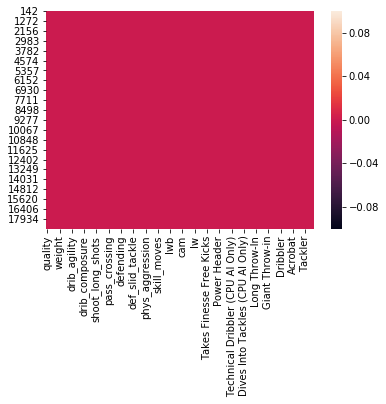

In [46]:
sns.heatmap(data.isnull(), cbar=True)

In [47]:
#   
utl.plot_missing(data) 

Here, we ending with cleaning data as we can see there no more missing data to be treaten

---
## Last hot encoding

In [48]:
total_columns = list(data.columns)

# 
data = pd.get_dummies(data)

# Print the number of features after one-hot encoding
encoded = list(data.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
print("{} total features added after one-hot encoding.".format(len(encoded) - len(total_columns)))

print(encoded)
data.shape

132 total features after one-hot encoding.
23 total features added after one-hot encoding.
['overall', 'age', 'height', 'weight', 'pace', 'pace_acceleration', 'pace_sprint_speed', 'dribbling', 'drib_agility', 'drib_balance', 'drib_reactions', 'drib_ball_control', 'drib_dribbling', 'drib_composure', 'shooting', 'shoot_positioning', 'shoot_finishing', 'shoot_shot_power', 'shoot_long_shots', 'shoot_volleys', 'shoot_penalties', 'passing', 'pass_vision', 'pass_crossing', 'pass_free_kick', 'pass_short', 'pass_long', 'pass_curve', 'defending', 'def_interceptions', 'def_heading', 'def_marking', 'def_stand_tackle', 'def_slid_tackle', 'physicality', 'phys_jumping', 'phys_stamina', 'phys_strength', 'phys_aggression', 'weak_foot', 'skill_moves', 'cb', 'rb', 'lb', 'rwb', 'lwb', 'cdm', 'cm', 'rm', 'lm', 'cam', 'cf', 'rf', 'lf', 'rw', 'lw', 'st', 'Finesse Shot', 'Avoids Using Weaker Foot', 'Flair', 'Takes Finesse Free Kicks', 'Tries To Beat Defensive Line', 'Team Player', 'Puncher', 'Power Free-Kick'

(15298, 132)

## Drop Highly Correlated Features

In [49]:
data.shape

(15298, 132)

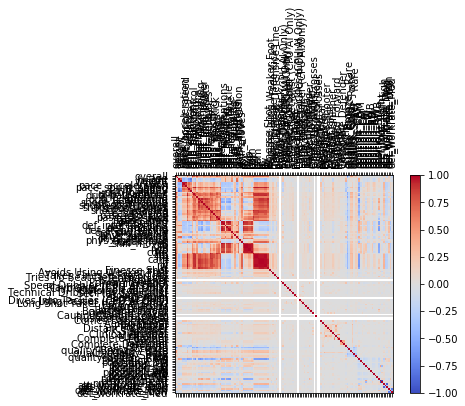

Variables to be droped: ['pace_acceleration', 'pace_sprint_speed', 'drib_ball_control', 'drib_dribbling', 'shoot_finishing', 'shoot_long_shots', 'pass_short', 'def_interceptions', 'def_marking', 'def_stand_tackle', 'def_slid_tackle', 'cb', 'rb', 'lb', 'rwb', 'lwb', 'cdm', 'cm', 'rm', 'lm', 'cam', 'cf', 'rf', 'lf', 'rw', 'lw', 'st', 'pref_foot_Right']


In [50]:
data = utl.highCorrelated_drop(data)

In [51]:
data.shape

(15298, 104)

---
## Normalizing Numerical Features

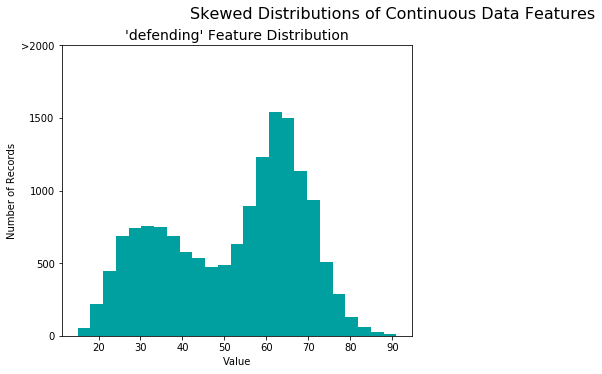

In [52]:
# Split the data into features and target label
data_bkp = pd.DataFrame(data)
data_raw = pd.DataFrame(data)

overall_raw = data_raw.overall
features_raw = data_raw.drop('overall', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(features_raw,['defending'] )

In [53]:
features_raw.shape


(15298, 103)

In [54]:
data_number = list(features_raw.select_dtypes(include=[np.number]).columns.values)

In [55]:
features_raw.head(1)

age  height  weight  pace  dribbling  drib_agility  drib_balance  \
142   34     187      83  90.0       90.0            87            70   

     drib_reactions  drib_composure  shooting  shoot_positioning  \
142              96              95      93.0                 95   

     shoot_shot_power  shoot_volleys  shoot_penalties  passing  pass_vision  \
142                95             87               85     81.0           82   

     pass_crossing  pass_free_kick  pass_long  pass_curve  defending  \
142             84              76         77          81       35.0   

     def_heading  physicality  phys_jumping  phys_stamina  phys_strength  \
142           89         79.0            95            88             79   

     phys_aggression  weak_foot  skill_moves  Finesse Shot  \
142               63          4            5             0   

     Avoids Using Weaker Foot  Flair  Takes Finesse Free Kicks  \
142                         0      1                         0   

     Tries To Beat Defensive Line  Team Player  Puncher  Power Free-Kick  \
142                             0            0        0                1   

     Power Header  Speed Dribbler (CPU AI Only)  Playmaker (CPU AI Only)  \
142             0                             0                        0   

     Chip Shot (CPU AI Only)  Outside Foot Shot  \
142                        0                  0   

     Technical Dribbler (CPU AI Only)  Set Play Specialist  Solid Player  \
142                                 0                    0             0   

     Leadership  1-on-1 Rush  Dives Into Tackles (CPU AI Only)  \
142           0            0                                 0   

     Long Passer (CPU AI Only)  Long Shot Taker (CPU AI Only)  Early Crosser  \
142                          0                              0              0   

     Injury Prone  Long Throw-In  Target Forward  Backs Into Player  \
142             0              0               0                  0   

     One Club Player  Cautious With Crosses  Giant Throw-in  \
142                0                      0               0   

     Rushes out of goal  Comes For Crosses  Speedster  Aerial Threat  \
142                   0                  0          1              0   

     Dribbler  Play Maker  Distance Shooter  Crosser  FK Specialist  Acrobat  \
142         1           0                 1        0              0        1   

     Clinical Finisher  Midfielder  Complete Forward  Poacher  Tackler  \
142                  1           0                 1        1        0   

     Tactician  Complete Defender  Strength  quality_Bronze  \
142          0                  0         0               0   

     quality_Bronze - Rare  quality_Gold  quality_Gold - Rare  quality_Silver  \
142                      0             0                    1               0   

     quality_Silver - Rare  position_CAM  position_CB  position_CDM  \
142                      0             0            0             0   

     position_CF  position_CM  position_LB  position_LM  position_LW  \
142            0            0            0            0            0   

     position_LWB  position_RB  position_RM  position_RW  position_RWB  \
142             0            0            0            0             0   

     position_ST  pref_foot_Left  att_workrate_High  att_workrate_Low  \
142            1               0                  1                 0   

     att_workrate_Med  def_workrate_High  def_workrate_Low  def_workrate_Med  
142                 0                  0                 1                 0

(15298, 103)

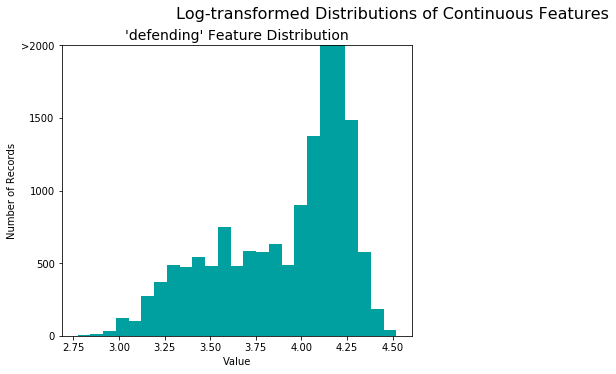

In [56]:
# Log-transform the skewed features
skewed = data_number
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, ['defending'], transformed = True)

features_log_transformed.shape

---
## Log transform

In [57]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

numerical = data_number

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
features_log_minmax_transform.head(1)

age   height   weight      pace  dribbling  drib_agility  \
142  0.763614  0.68308  0.64162  0.952906   0.952906      0.930281   

     drib_balance  drib_reactions  drib_composure  shooting  \
142      0.783194             1.0        0.990916       1.0   

     shoot_positioning  shoot_shot_power  shoot_volleys  shoot_penalties  \
142                1.0               1.0       0.984135         0.960231   

      passing  pass_vision  pass_crossing  pass_free_kick  pass_long  \
142  0.904181     0.934733       0.951106        0.902563   0.879432   

     pass_curve  defending  def_heading  physicality  phys_jumping  \
142    0.928874   0.463601     0.969647     0.889491           1.0   

     phys_stamina  phys_strength  phys_aggression  weak_foot  skill_moves  \
142      0.930725       0.838005         0.789401   0.834044          1.0   

     Finesse Shot  Avoids Using Weaker Foot  Flair  Takes Finesse Free Kicks  \
142           0.0                       0.0    1.0                       0.0   

     Tries To Beat Defensive Line  Team Player  Puncher  Power Free-Kick  \
142                           0.0          0.0      0.0              1.0   

     Power Header  Speed Dribbler (CPU AI Only)  Playmaker (CPU AI Only)  \
142           0.0                           0.0                      0.0   

     Chip Shot (CPU AI Only)  Outside Foot Shot  \
142                      0.0                0.0   

     Technical Dribbler (CPU AI Only)  Set Play Specialist  Solid Player  \
142                               0.0                  0.0           0.0   

     Leadership  1-on-1 Rush  Dives Into Tackles (CPU AI Only)  \
142         0.0          0.0                               0.0   

     Long Passer (CPU AI Only)  Long Shot Taker (CPU AI Only)  Early Crosser  \
142                        0.0                            0.0            0.0   

     Injury Prone  Long Throw-In  Target Forward  Backs Into Player  \
142           0.0            0.0             0.0                0.0   

     One Club Player  Cautious With Crosses  Giant Throw-in  \
142              0.0                    0.0             0.0   

     Rushes out of goal  Comes For Crosses  Speedster  Aerial Threat  \
142                 0.0                0.0        1.0            0.0   

     Dribbler  Play Maker  Distance Shooter  Crosser  FK Specialist  Acrobat  \
142       1.0         0.0               1.0      0.0            0.0      1.0   

     Clinical Finisher  Midfielder  Complete Forward  Poacher  Tackler  \
142                1.0         0.0               1.0      1.0      0.0   

     Tactician  Complete Defender  Strength  quality_Bronze  \
142        0.0                0.0       0.0             0.0   

     quality_Bronze - Rare  quality_Gold  quality_Gold - Rare  quality_Silver  \
142                    0.0           0.0                  1.0             0.0   

     quality_Silver - Rare  position_CAM  position_CB  position_CDM  \
142                    0.0           0.0          0.0           0.0   

     position_CF  position_CM  position_LB  position_LM  position_LW  \
142          0.0          0.0          0.0          0.0          0.0   

     position_LWB  position_RB  position_RM  position_RW  position_RWB  \
142           0.0          0.0          0.0          0.0           0.0   

     position_ST  pref_foot_Left  att_workrate_High  att_workrate_Low  \
142          1.0             0.0                1.0               0.0   

     att_workrate_Med  def_workrate_High  def_workrate_Low  def_workrate_Med  
142               0.0                0.0               1.0               0.0

In [58]:
features_log_minmax_transform.shape

(15298, 103)

In [59]:
features_log_minmax_transform.shape

(15298, 103)

In [60]:

features_final = pd.DataFrame(features_log_minmax_transform)

In [61]:
overall = overall_raw

In [62]:
features_final.shape

(15298, 103)

----
## Benchmark

In [63]:
# Counting the ones as this is the naive case. Note that 'overall' is the 'overall_raw' data 
#encoded to numerical values done in the data preprocessing step.
TP = np.sum(overall) 

# Specific to the naive case
FP = overall.count() - TP 

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = float(TP)/(TP+FP)
recall = float(TP)/(TP+FN)
precision = accuracy

fscore = (1+0.5**2)*(precision*recall)/(0.5**2*precision+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 66.9915, F-score: 4.7183]


---
## Implementation

Training set has 10708 samples.
Testing set has 4590 samples.
Estimated intercept coefficiente -11936875152095.975
Number of coefficients: 103
coefficient of determination: -5378563791130.69
Mean Absolute Error MAE: 227924.18116489652
Mean Squared Error MSE: 238444937442912.16
R Squared: 15441662.392466433


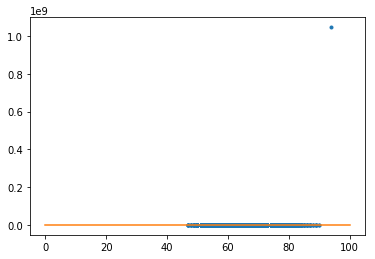

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



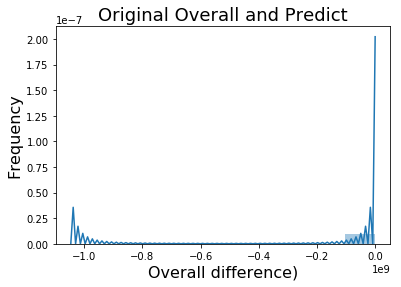

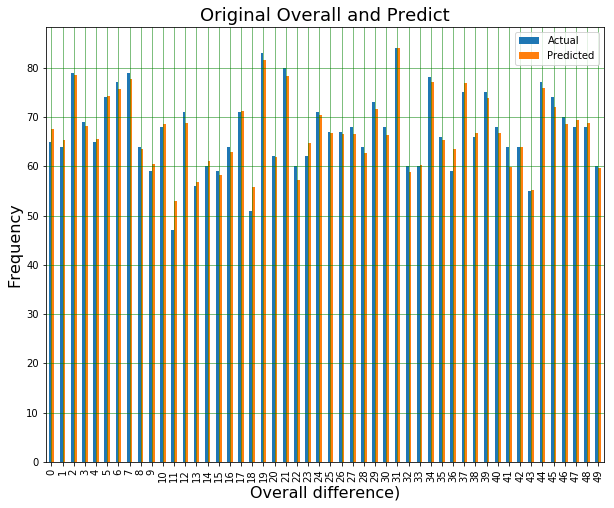

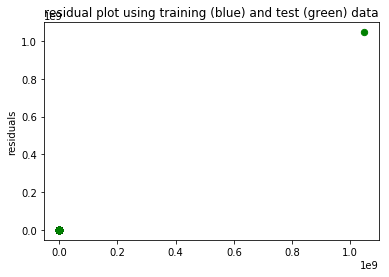

In [64]:
mdl.model_execution(features_final, overall)

---
## Refinement

---
## Lasso

In [65]:
reg = LassoCV()
reg.fit(features_final, overall)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(features_final,overall))
coef = pd.Series(reg.coef_, index = features_final.columns)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Best alpha using built-in LassoCV: 0.001901
Best score using built-in LassoCV: 0.927317


In [66]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 69 variables and eliminated the other 34 variables


Text(0.5,1,'Feature importance using Lasso Model')

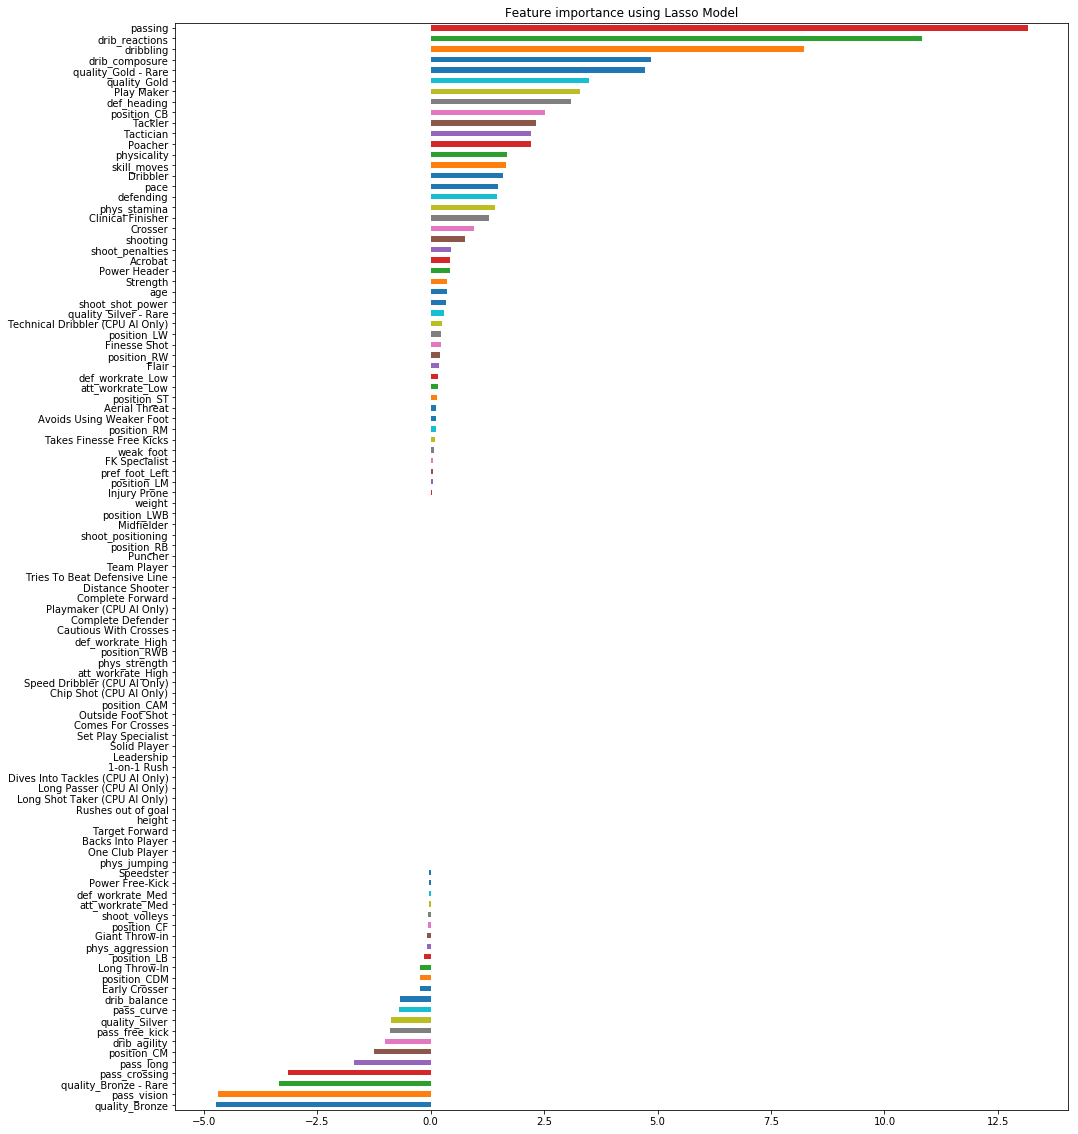

In [67]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [68]:
features_x_coef = pd.DataFrame(list(zip(features_final.columns, coef)), columns = ["features", "lassoCoef"])

In [69]:
features_x_coef_0 = features_x_coef.query('lassoCoef == 0')

In [70]:
features_x_coef.query('lassoCoef == 0').count()

features     34
lassoCoef    34
dtype: int64

In [71]:
values = []
values = features_x_coef_0.features
to_drop = "','".join(values)
to_drop = "'" + values + "'"
#to_drop

In [72]:
features_after_lasso = features_final
features_after_lasso.drop(features_after_lasso[values], axis=1, inplace=True)

In [73]:
features_after_lasso.shape

(15298, 69)

Training set has 10708 samples.
Testing set has 4590 samples.
Estimated intercept coefficiente -300302338209.6265
Number of coefficients: 69
coefficient of determination: 0.9258851400408786
Mean Absolute Error MAE: 1.422128634982639
Mean Squared Error MSE: 3.285693696834358
R Squared: 1.8126482551323513


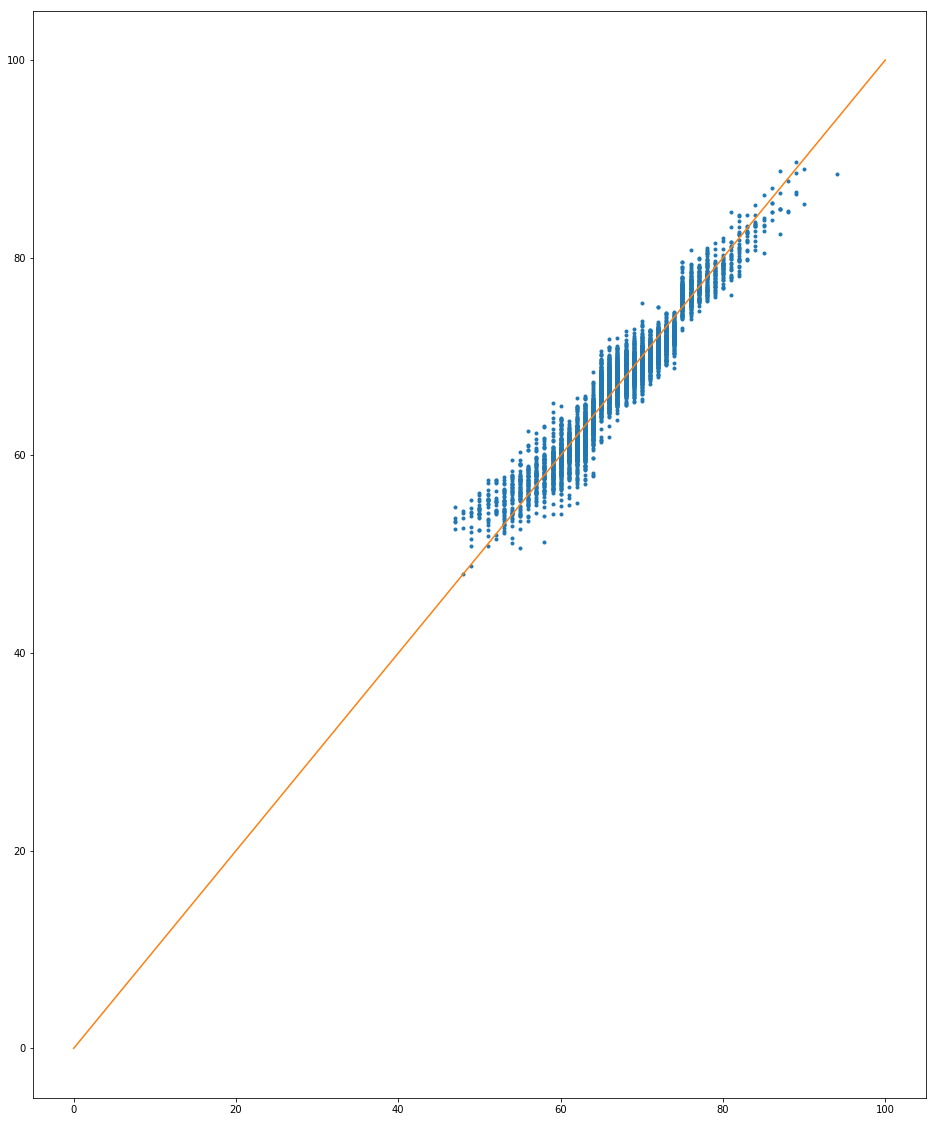

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



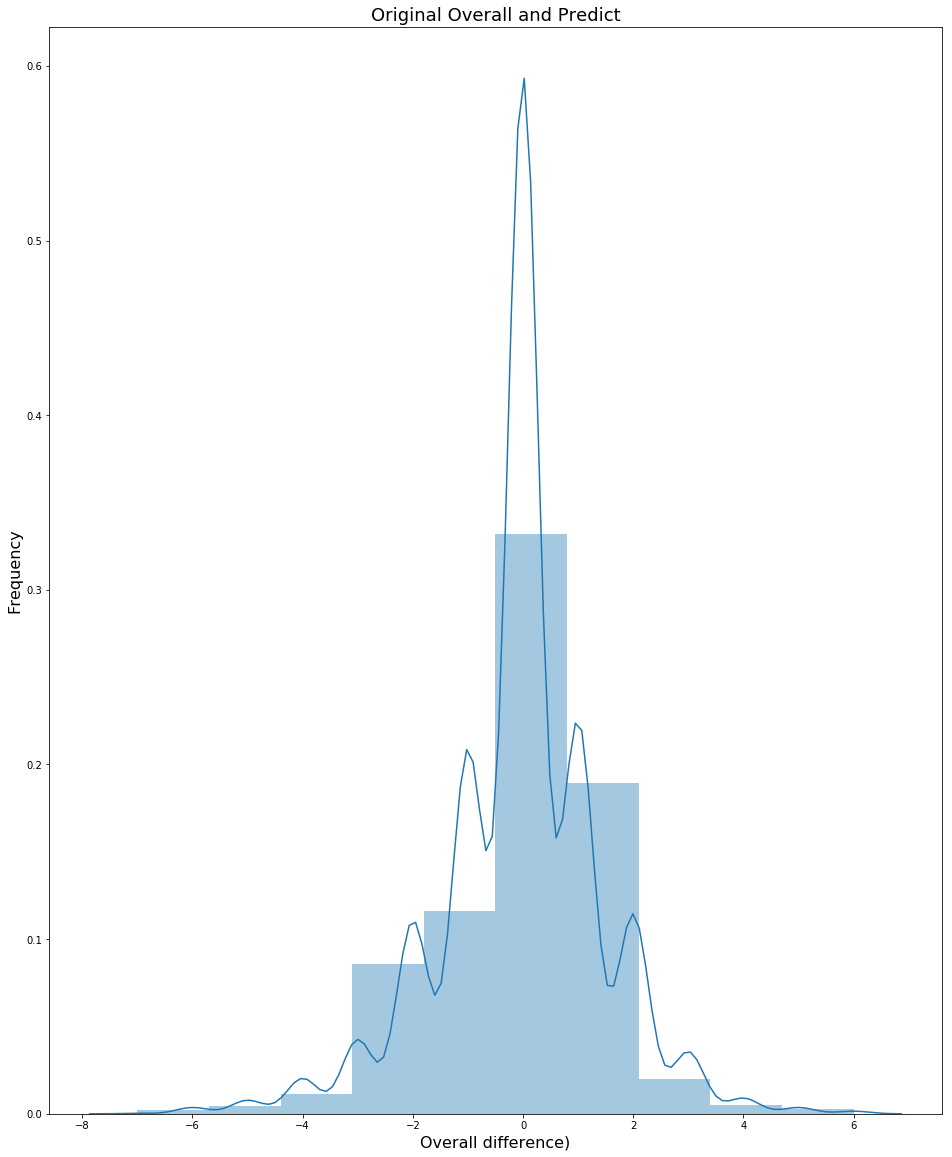

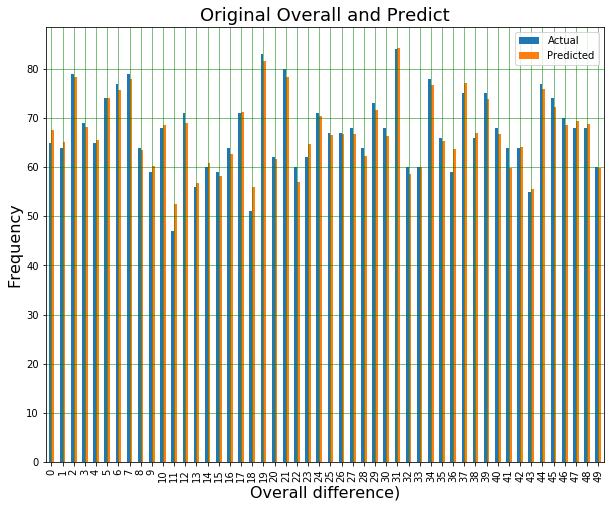

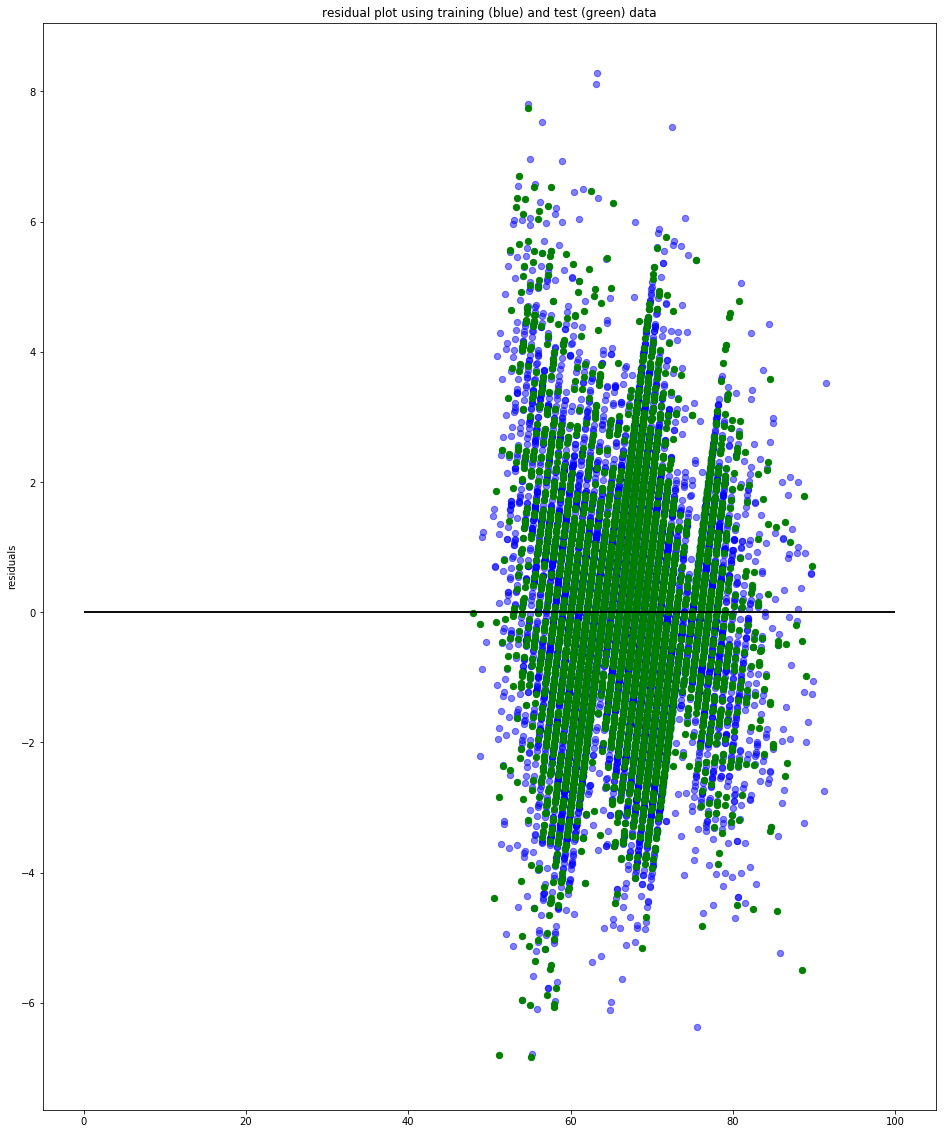

In [74]:
mdl.model_execution(features_after_lasso, overall)

### RFE (Recursive Feature Elimination)

In [75]:
features_x_rfe = mdl.advanced_RFE(features_final, overall, 0.3, len(features_final.columns))
features_x_rfe.shape

          features  ranking  support
0              age        1     True
30    Power Header        1     True
32   Early Crosser        1     True
35  Giant Throw-in        1     True
36       Speedster        1     True
37   Aerial Threat        1     True
38        Dribbler        1     True
39      Play Maker        1     True
40         Crosser        1     True
41   FK Specialist        1     True
Optimum number of features: 0
Score with 0 features: 0.000000
# Iteration 1 processing time:0.0
Optimum number of features: 1
Score with 1 features: 0.687396
# Iteration 2 processing time:1.3799999999999955
Optimum number of features: 2
Score with 2 features: 0.770063
# Iteration 3 processing time:1.3699999999999903
Optimum number of features: 3
Score with 3 features: 0.774002
# Iteration 4 processing time:1.3699999999999903
Optimum number of features: 4
Score with 4 features: 0.784697
# Iteration 5 processing time:1.480000000000004
Optimum number of features: 5
Score with 5 features: 0

(68, 5)

In [76]:
features_x_rfe

features  id  number_features  higher_score  \
0                     weight   1                0      0.000000   
1                       pace   2                1      0.687396   
2                  dribbling   3                2      0.770063   
3               drib_agility   4                3      0.774002   
4               drib_balance   5                4      0.784697   
5             drib_reactions   6                5      0.803311   
6             drib_composure   7                6      0.808854   
7                   shooting   8                7      0.824535   
8           shoot_shot_power   9                8      0.842438   
9              shoot_volleys  10                9      0.874578   
10           shoot_penalties  11               10      0.875622   
11                   passing  12               11      0.875988   
12               pass_vision  13               12      0.876427   
13             pass_crossing  14               13      0.897133   
14            pass_free_kick  15               14      0.897671   
15                 pass_long  16               15      0.897798   
16                pass_curve  17               16      0.908039   
17                 defending  18               17      0.910473   
18               def_heading  19               18      0.910816   
19               physicality  20               19      0.911577   
20              phys_stamina  21               19      0.911577   
21           phys_aggression  22               21      0.912073   
22                 weak_foot  23               22      0.912823   
23               skill_moves  24               23      0.914704   
24              Finesse Shot  25               23      0.914704   
25  Avoids Using Weaker Foot  26               25      0.914913   
26                     Flair  27               26      0.918957   
27  Takes Finesse Free Kicks  28               27      0.919191   
28           Power Free-Kick  29               28      0.919281   
29              Power Header  30               29      0.919432   
..                       ...  ..              ...           ...   
38                Play Maker  39               38      0.925126   
39                   Crosser  40               39      0.925143   
40             FK Specialist  41               40      0.925228   
41                   Acrobat  42               40      0.925228   
42         Clinical Finisher  43               42      0.925247   
43                   Poacher  44               43      0.925452   
44                   Tackler  45               44      0.925526   
45                 Tactician  46               45      0.925554   
46                  Strength  47               46      0.925623   
47            quality_Bronze  48               46      0.925623   
48     quality_Bronze - Rare  49               46      0.925623   
49              quality_Gold  50               46      0.925623   
50       quality_Gold - Rare  51               46      0.925623   
51            quality_Silver  52               46      0.925623   
52     quality_Silver - Rare  53               46      0.925623   
53               position_CB  54               46      0.925623   
54              position_CDM  55               54      0.925631   
55               position_CF  56               55      0.925694   
56               position_CM  57               56      0.925795   
57               position_LB  58               57      0.925815   
58               position_LM  59               58      0.925833   
59               position_LW  60               59      0.925845   
60               position_RM  61               59      0.925845   
61               position_RW  62               59      0.925845   
62               position_ST  63               59      0.925845   
63            pref_foot_Left  64               59      0.925845   
64          att_workrate_Low  65               59      0.925845   
65          att_workrate_Med  66               65      0.925849   


In [77]:
dont_drop = features_x_rfe.features[features_x_rfe.number_features.max()] + "," + features_x_rfe.feature_list[features_x_rfe.number_features.max()] 


In [78]:
features_x_rfe = utl.features_to_drop(data, dont_drop)

In [79]:
features_x_rfe.shape

(15298, 68)

Training set has 10708 samples.
Testing set has 4590 samples.
Estimated intercept coefficiente 29.418935363800536
Number of coefficients: 68
coefficient of determination: 0.9308815095484677
Mean Absolute Error MAE: 1.3710499364211424
Mean Squared Error MSE: 3.064192370282628
R Squared: 1.7504834675833496


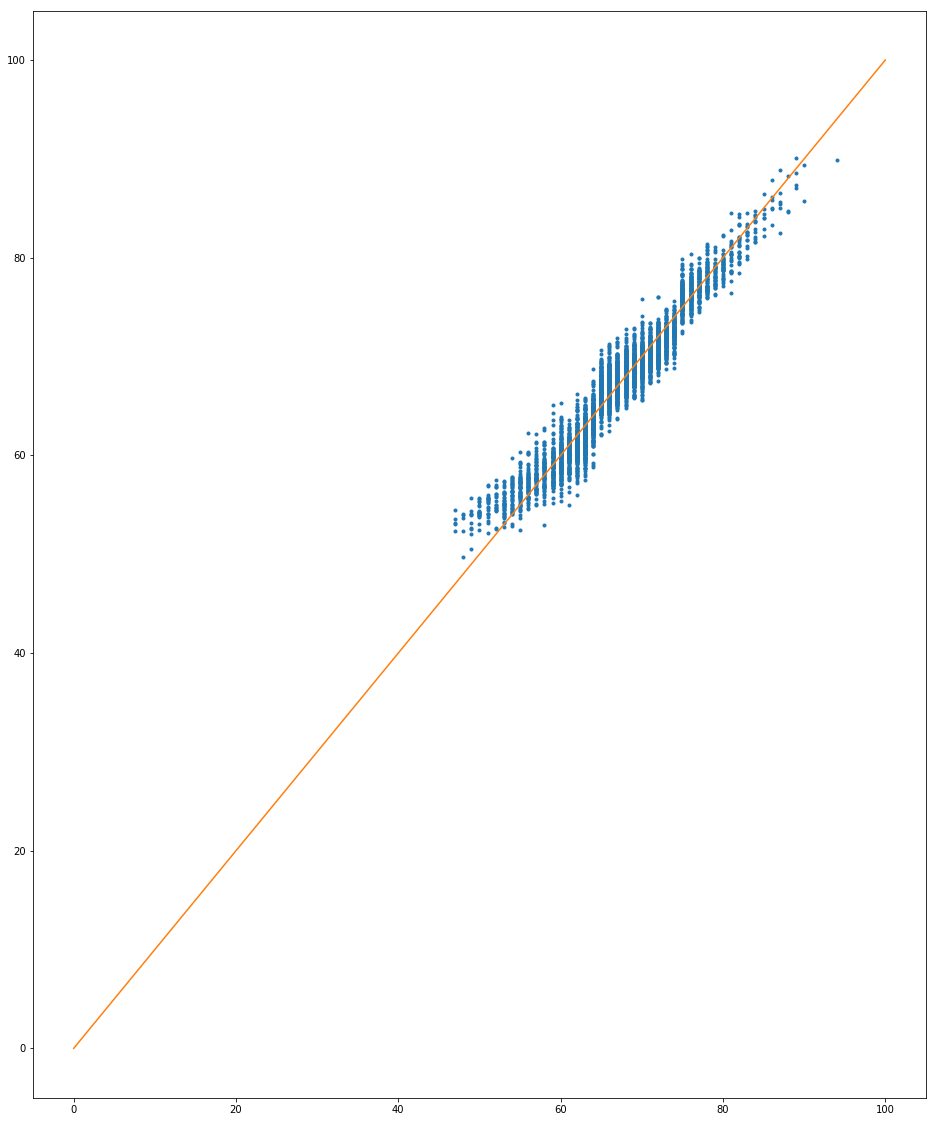

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



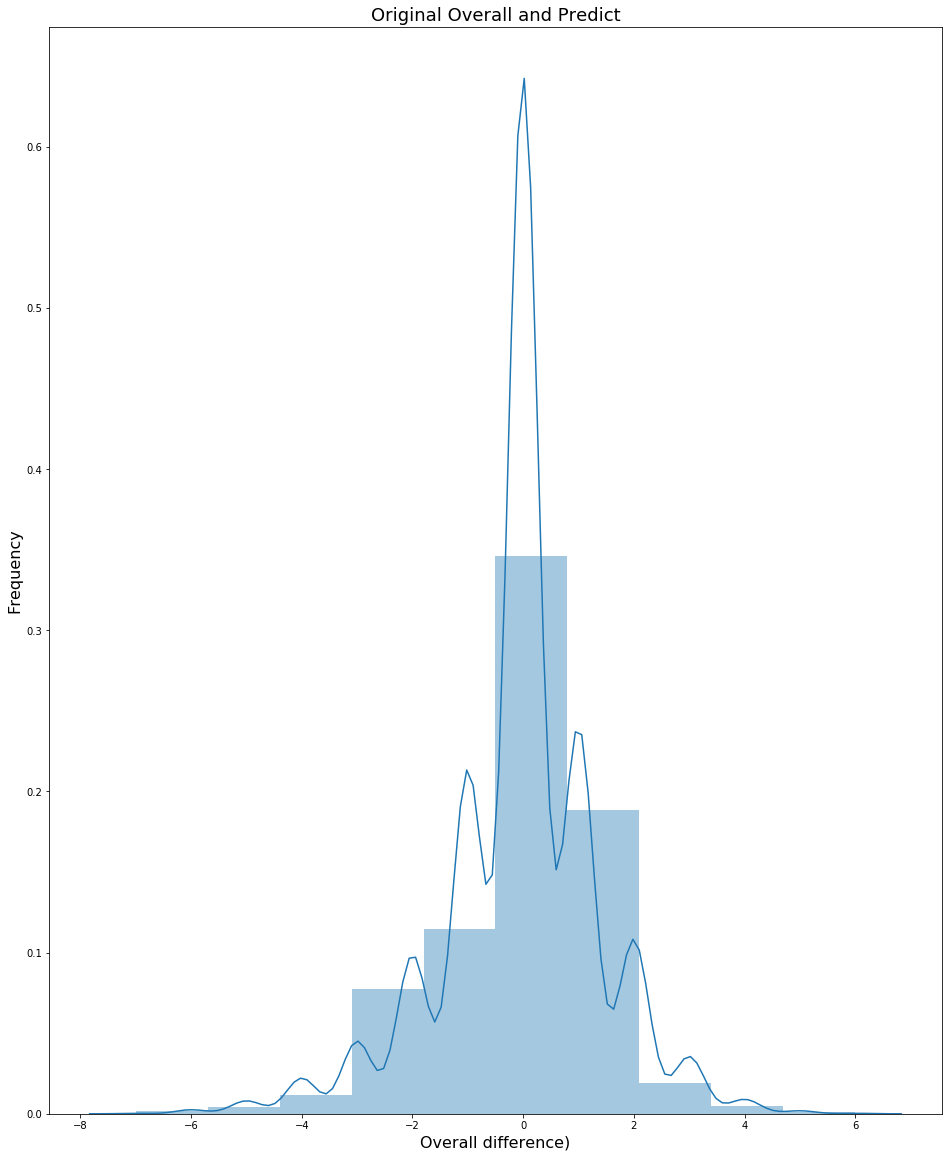

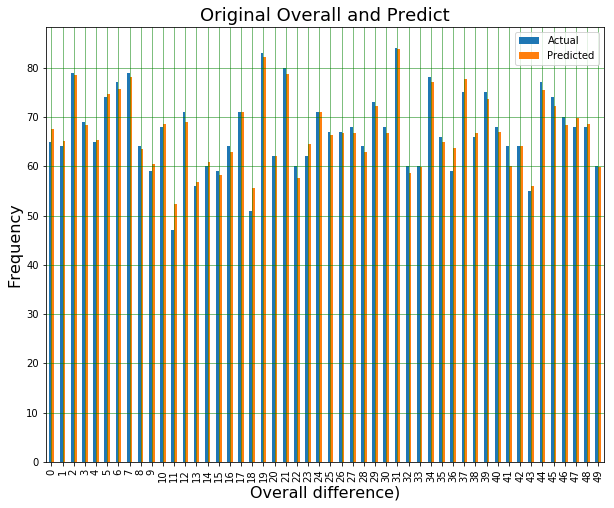

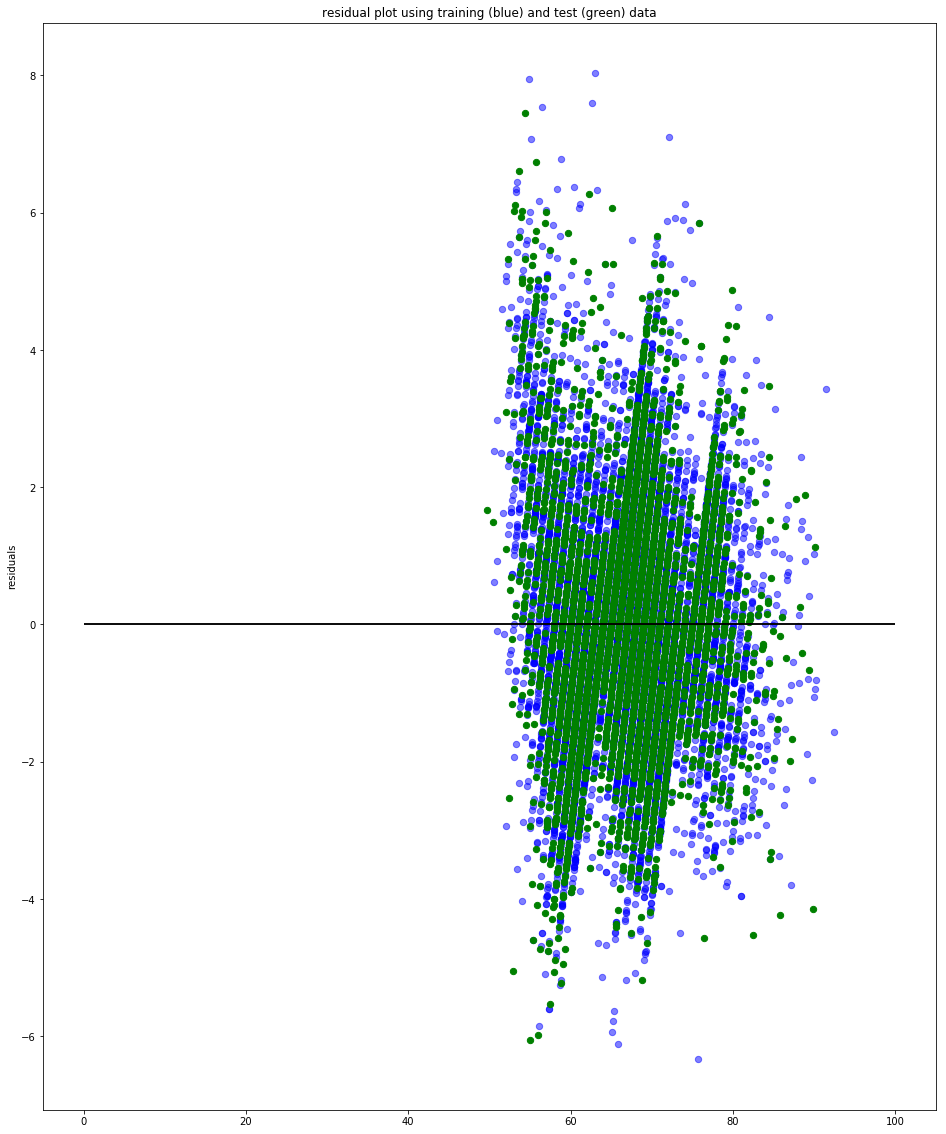

In [80]:
mdl.model_execution(features_x_rfe, overall)

In [81]:
features_final_thanos  = pd.DataFrame(data)
features_final_thanos = pd.concat([features_final, overall], axis=1, join='inner')

In [82]:
features_final_thanos.head(1)

age   weight      pace  dribbling  drib_agility  drib_balance  \
142  0.763614  0.64162  0.952906   0.952906      0.930281      0.783194   

     drib_reactions  drib_composure  shooting  shoot_shot_power  \
142             1.0        0.990916       1.0               1.0   

     shoot_volleys  shoot_penalties   passing  pass_vision  pass_crossing  \
142       0.984135         0.960231  0.904181     0.934733       0.951106   

     pass_free_kick  pass_long  pass_curve  defending  def_heading  \
142        0.902563   0.879432    0.928874   0.463601     0.969647   

     physicality  phys_stamina  phys_aggression  weak_foot  skill_moves  \
142     0.889491      0.930725         0.789401   0.834044          1.0   

     Finesse Shot  Avoids Using Weaker Foot  Flair  Takes Finesse Free Kicks  \
142           0.0                       0.0    1.0                       0.0   

     Power Free-Kick  Power Header  Technical Dribbler (CPU AI Only)  \
142              1.0           0.0                               0.0   

     Early Crosser  Injury Prone  Long Throw-In  Giant Throw-in  Speedster  \
142            0.0           0.0            0.0             0.0        1.0   

     Aerial Threat  Dribbler  Play Maker  Crosser  FK Specialist  Acrobat  \
142            0.0       1.0         0.0      0.0            0.0      1.0   

     Clinical Finisher  Poacher  Tackler  Tactician  Strength  quality_Bronze  \
142                1.0      1.0      0.0        0.0       0.0             0.0   

     quality_Bronze - Rare  quality_Gold  quality_Gold - Rare  quality_Silver  \
142                    0.0           0.0                  1.0             0.0   

     quality_Silver - Rare  position_CB  position_CDM  position_CF  \
142                    0.0          0.0           0.0          0.0   

     position_CM  position_LB  position_LM  position_LW  position_RM  \
142          0.0          0.0          0.0          0.0          0.0   

     position_RW  position_ST  pref_foot_Left  att_workrate_Low  \
142          0.0          1.0             0.0               0.0   

     att_workrate_Med  def_workrate_Low  def_workrate_Med  overall  
142               0.0               1.0               0.0       94

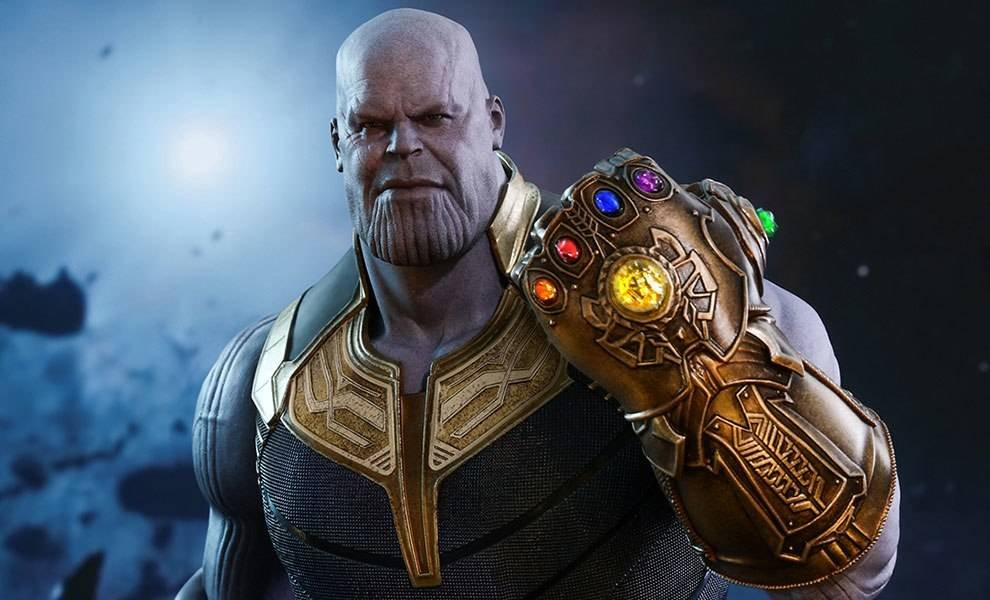

In [83]:
features_final_thanos.shape

(15298, 70)

In [84]:
features_final_thanos.overall.head(5)

142    94
145    89
146    89
153    86
154    86
Name: overall, dtype: int64

In [85]:
features_final_thanos = utl.thanos(features_final_thanos, 100, 'overall', .20)

[ True  True False ... False False False]


In [86]:
features_final_thanos.shape

(12281, 70)

In [87]:
overall_thanos = features_final_thanos.overall
features_final_thanos = features_final_thanos.drop('overall', axis = 1)

Training set has 8596 samples.
Testing set has 3685 samples.
Estimated intercept coefficiente -2457944765109.356
Number of coefficients: 69
coefficient of determination: 0.9278473331588036
Mean Absolute Error MAE: 1.3980833138992537
Mean Squared Error MSE: 3.15515674186044
R Squared: 1.7762760882983366


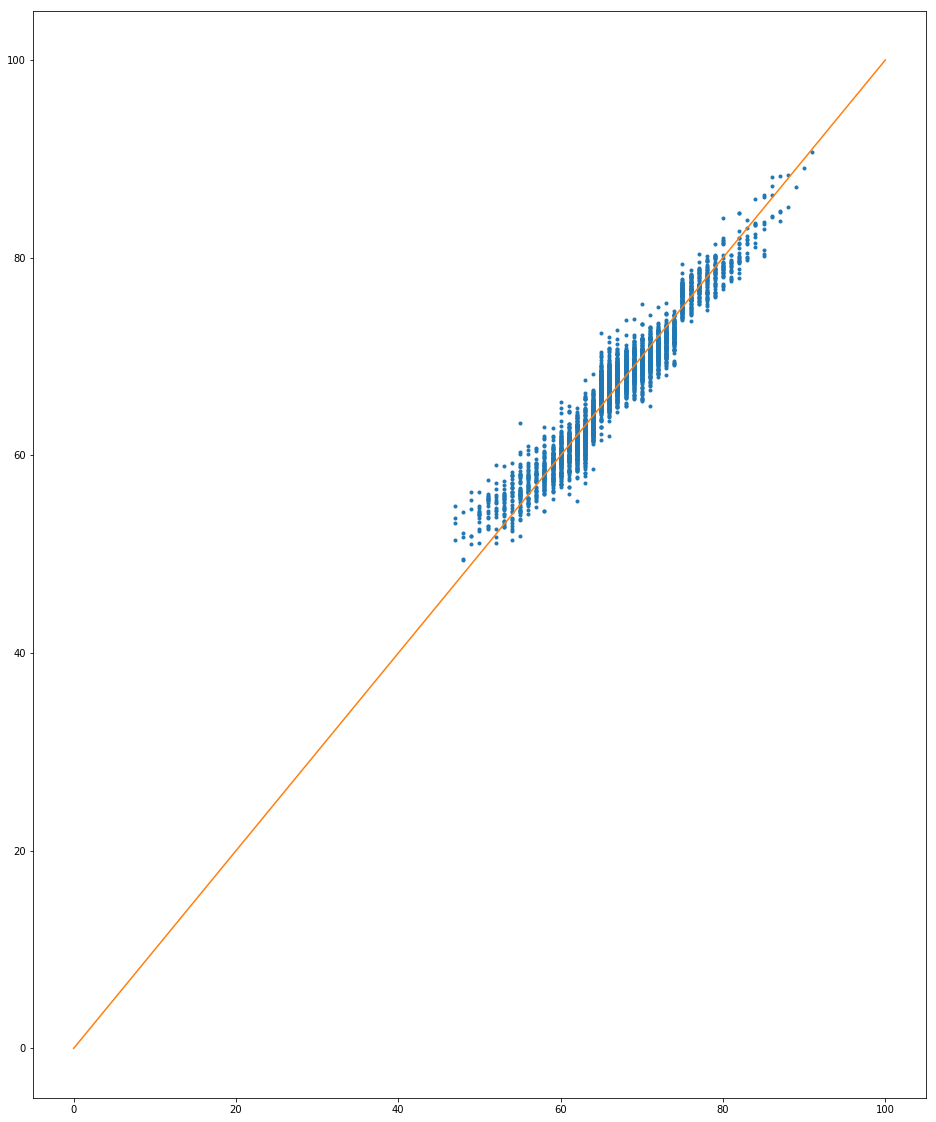

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



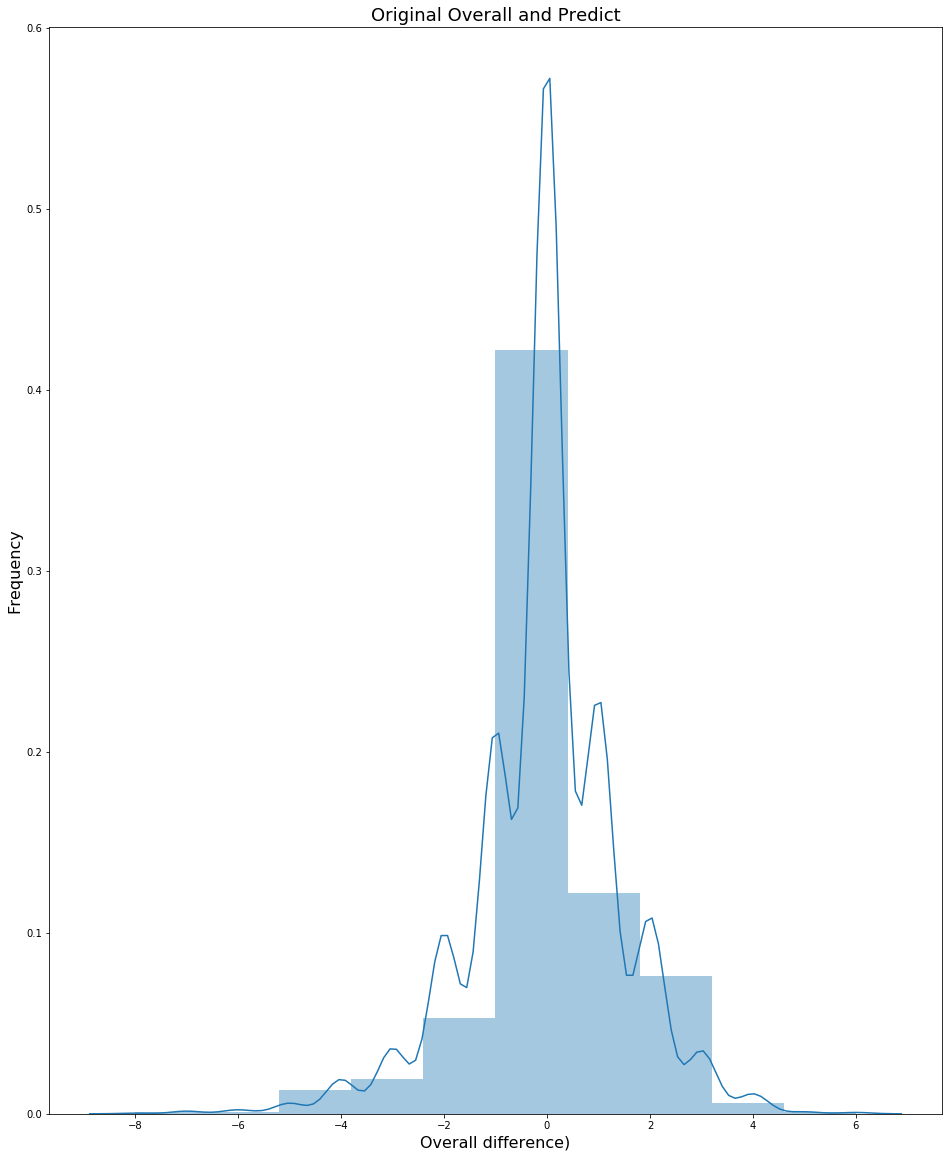

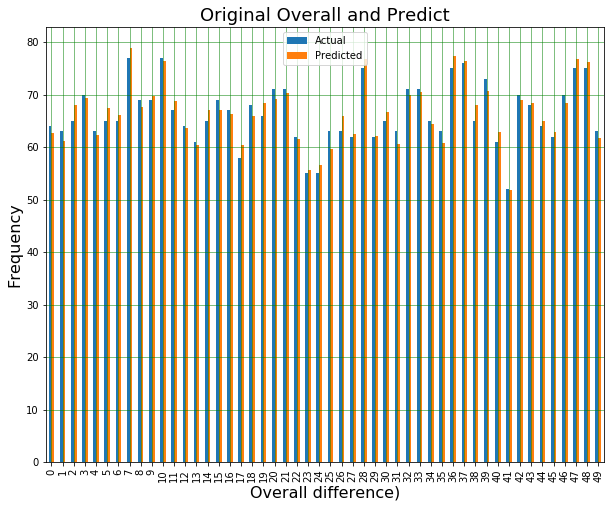

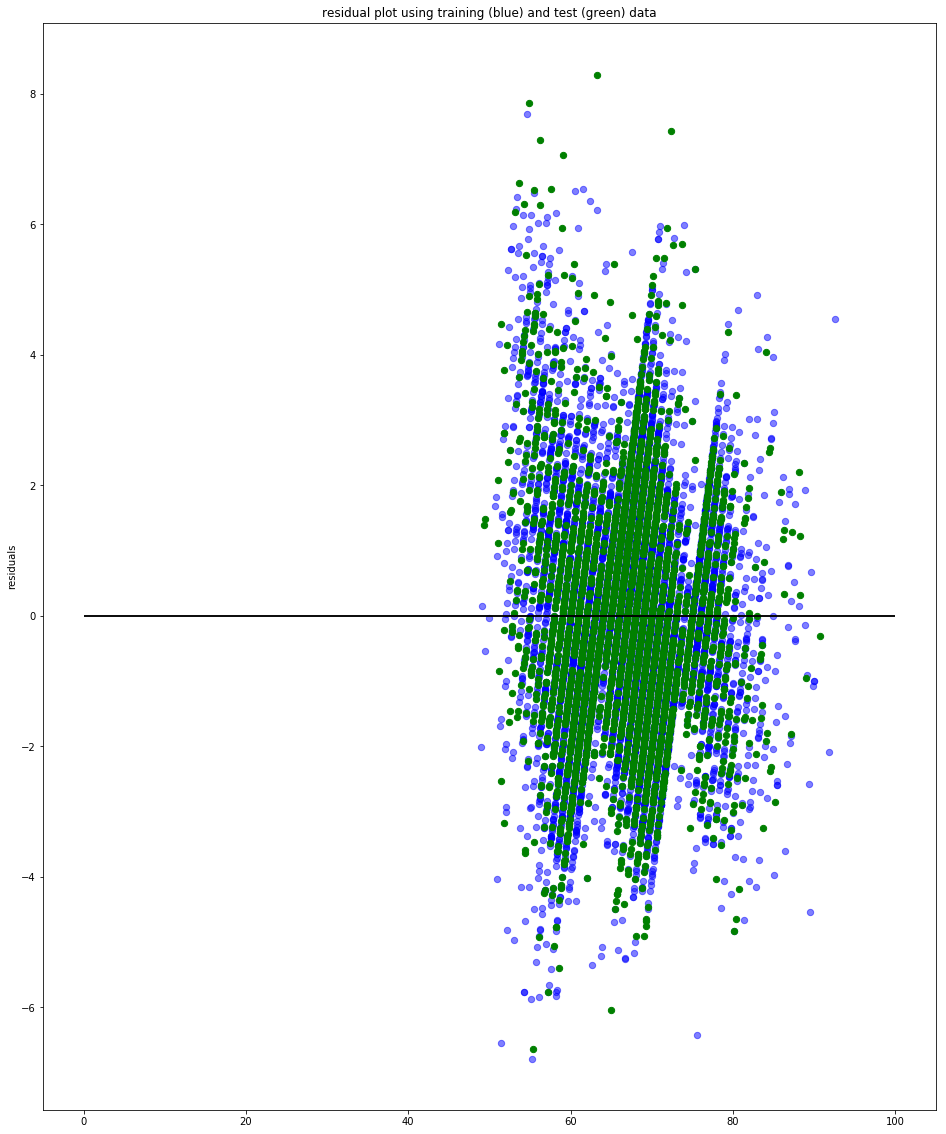

In [88]:
mdl.model_execution(features_final_thanos, overall_thanos)